<a href="https://www.kaggle.com/code/prasadbale/pokemon-eda?scriptVersionId=108440743" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/pokemon.csv


## <font color = red>***1.0 Importing all required libraries***</font>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## <font color = red>***1.0.1 Reading CSV file***</font>

In [3]:
pokemon = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## <font color = red>***1.1 Getting more info about the data set***</font>

In [4]:
pokemon.shape

(801, 41)

In [5]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### <font color = red >There is a typo for the column 'classification'. Lets rename it and confirm.</font>

In [6]:
pokemon.rename(columns={'classfication':'classification'},inplace=True)

In [7]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classification', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

### <font color = red>We have some missing values for height and weight of pokemons.</font>
### <font color = red>Missing values in percentage_male and type2 column are of Missing Not At Random type. Hence will neglect those.</font>
### <font color = red>Lets calculate the percentage of missing values in height and weight columns.</font>

## <font color = red>***1.1.1 Handling missing values***</font>

In [9]:
pokemon[['height_m','weight_kg']].isnull().sum() * 100 / len(pokemon)

height_m     2.496879
weight_kg    2.496879
dtype: float64

### <font color = red>We have around 2.5 % of missing values in each of height and weight column. Let us impute those missing values with mean values and verify the missing values again.</font>

In [10]:
pokemon['height_m'].fillna(pokemon['height_m'].mean(),inplace=True)
pokemon['weight_kg'].fillna(pokemon['weight_kg'].mean(),inplace=True)

In [11]:
pokemon[['height_m','weight_kg']].isnull().sum() * 100 / len(pokemon)

height_m     0.0
weight_kg    0.0
dtype: float64

## <font color = red>***1.1.2 fixing data types***</font>

### <font color = red>`Capture rate` column is in object data type. Converting it into float data type.</font>

In [12]:
pokemon['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
170                           2
130                           2
15                            2
220                           2
80                            2
205                           1
155                           1
145                           1
35      

### <font color =red > There is row in `capture rate` column where capture rate is '30 (Meteorite)255 (Core)'. lets change it to the max value as 255. </font>  

In [13]:
pokemon[pokemon.capture_rate == '30 (Meteorite)255 (Core)']['capture_rate']

773    30 (Meteorite)255 (Core)
Name: capture_rate, dtype: object

In [14]:
pokemon.loc[773,'capture_rate'] = 255

In [15]:
pokemon['capture_rate'] = pokemon['capture_rate'].apply(lambda x: float(x))

In [16]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## <font color = red>***1.3 Univariate Analysis***</font>

### <font color = red>1.3.1 Checking all numeric Columns</font>

In [17]:
pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.066737,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,107.979179,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,28.500000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


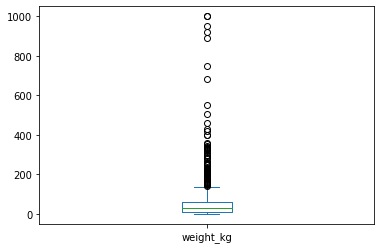

In [18]:
pokemon.weight_kg.plot.box()
plt.show()

In [19]:
heavy_pokemon = pokemon[pokemon['weight_kg'] > 500]
heavy_pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
375,"['Clear Body', 'Light Metal']",1.00,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,...,NaN,376,105,110,110,steel,psychic,550.0,3,0
382,['Drought'],1.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,383,150,90,90,ground,NaN,950.0,3,1
482,"['Pressure', 'Telepathy']",0.50,1.0,1.0,0.5,1.0,2.0,1.0,0.5,1.0,...,NaN,483,150,100,90,steel,dragon,683.0,4,1
486,"['Pressure', 'Telepathy', 'Levitate']",0.50,2.0,2.0,0.5,2.0,0.0,0.5,1.0,2.0,...,NaN,487,120,100,90,ghost,dragon,750.0,4,1
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.00,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,50.0,713,44,46,28,ice,NaN,505.0,6,0
749,"['Own Tempo', 'Stamina', 'Inner Focus']",1.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,750,55,85,35,ground,NaN,920.0,7,0
789,['Sturdy'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,790,29,131,37,psychic,NaN,999.9,7,1
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1


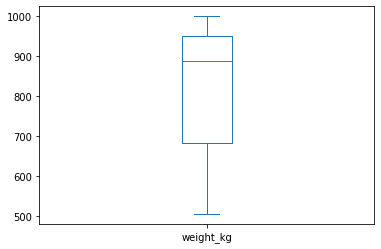

In [20]:
heavy_pokemon.weight_kg.plot.box()
plt.show()

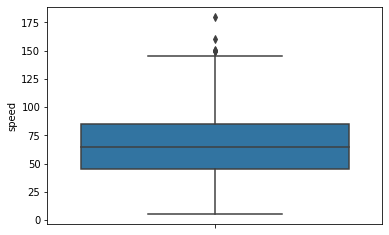

In [21]:
sns.boxplot(data=pokemon,y='speed')
plt.show()

In [22]:
pokemon[pokemon.speed > 150]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
290,"['Speed Boost', 'Infiltrator']",0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,50.0,291,50,50,160,bug,flying,12.0,3,0
385,['Pressure'],2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,NaN,386,95,90,180,psychic,NaN,60.8,3,1
794,['Beast Boost'],0.5,0.5,1.0,1.0,2.0,0.50,2.0,4.0,1.0,...,NaN,795,137,37,151,bug,fighting,25.0,7,1


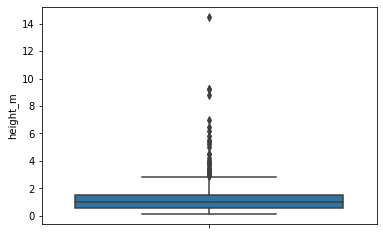

In [23]:
sns.boxplot(data=pokemon,y='height_m')
plt.show()

In [24]:
pokemon.abilities[:5]

0    ['Overgrow', 'Chlorophyll']
1    ['Overgrow', 'Chlorophyll']
2    ['Overgrow', 'Chlorophyll']
3       ['Blaze', 'Solar Power']
4       ['Blaze', 'Solar Power']
Name: abilities, dtype: object

## <font color = red>***1.3.1 fixing 'abilities column***</font>

### <font color =red> `abilities` column in in object format/list format.</font> 

In [25]:
import ast

def my_func(x):
    return ast.literal_eval(x)

pokemon.abilities = pokemon.abilities.apply(lambda x: my_func(x)) 

In [26]:
pokemon.abilities[:5]

0    [Overgrow, Chlorophyll]
1    [Overgrow, Chlorophyll]
2    [Overgrow, Chlorophyll]
3       [Blaze, Solar Power]
4       [Blaze, Solar Power]
Name: abilities, dtype: object

In [27]:
pokemon.name.value_counts()

Bulbasaur    1
Sawk         1
Drilbur      1
Excadrill    1
Audino       1
            ..
Lombre       1
Ludicolo     1
Seedot       1
Nuzleaf      1
Magearna     1
Name: name, Length: 801, dtype: int64

In [28]:
pokemon.classification.value_counts()

Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon    1
Name: classification, Length: 588, dtype: int64

In [29]:
pokemon.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [30]:
pokemon.type2.value_counts()

flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

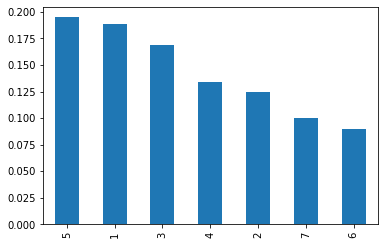

In [31]:
pokemon.generation.value_counts(normalize=True).plot.bar()
plt.show()

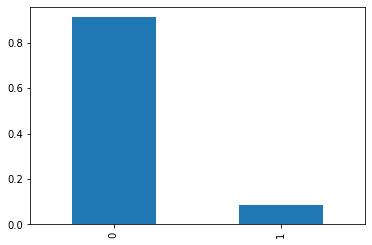

In [32]:
pokemon.is_legendary.value_counts(normalize=True).plot.bar()
plt.show()

### <font color =red> Legendary pokemons are very rare @ <10%</font> 

In [33]:
pokemon.percentage_male.mean(skipna=True)

55.15576102418208

### <font color =red> About 55% of pokemon population is of male category</font> 

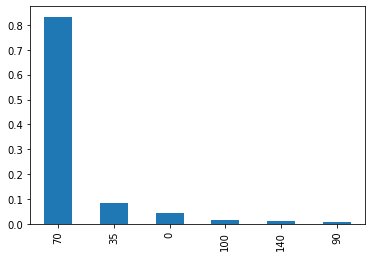

In [34]:
pokemon.base_happiness.value_counts(normalize=True).plot.bar()
plt.show()

### <font color =red> More than 80% of pokemons have a base happiness of 70 </font> 

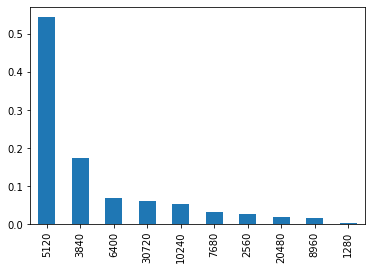

In [35]:
pokemon.base_egg_steps.value_counts(normalize=True).plot.bar()
plt.show()

### <font color =red> More than 50% of pokemons need 5120 steps for hacthing a egg </font> 

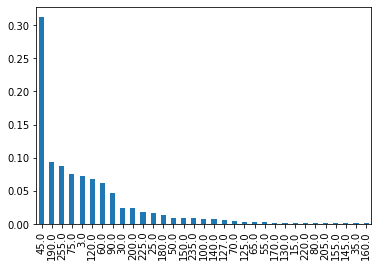

In [36]:
pokemon.capture_rate.value_counts(normalize=True).plot.bar()
plt.show()

## <font color = red>***1.4 Bivariate Analysis***</font>

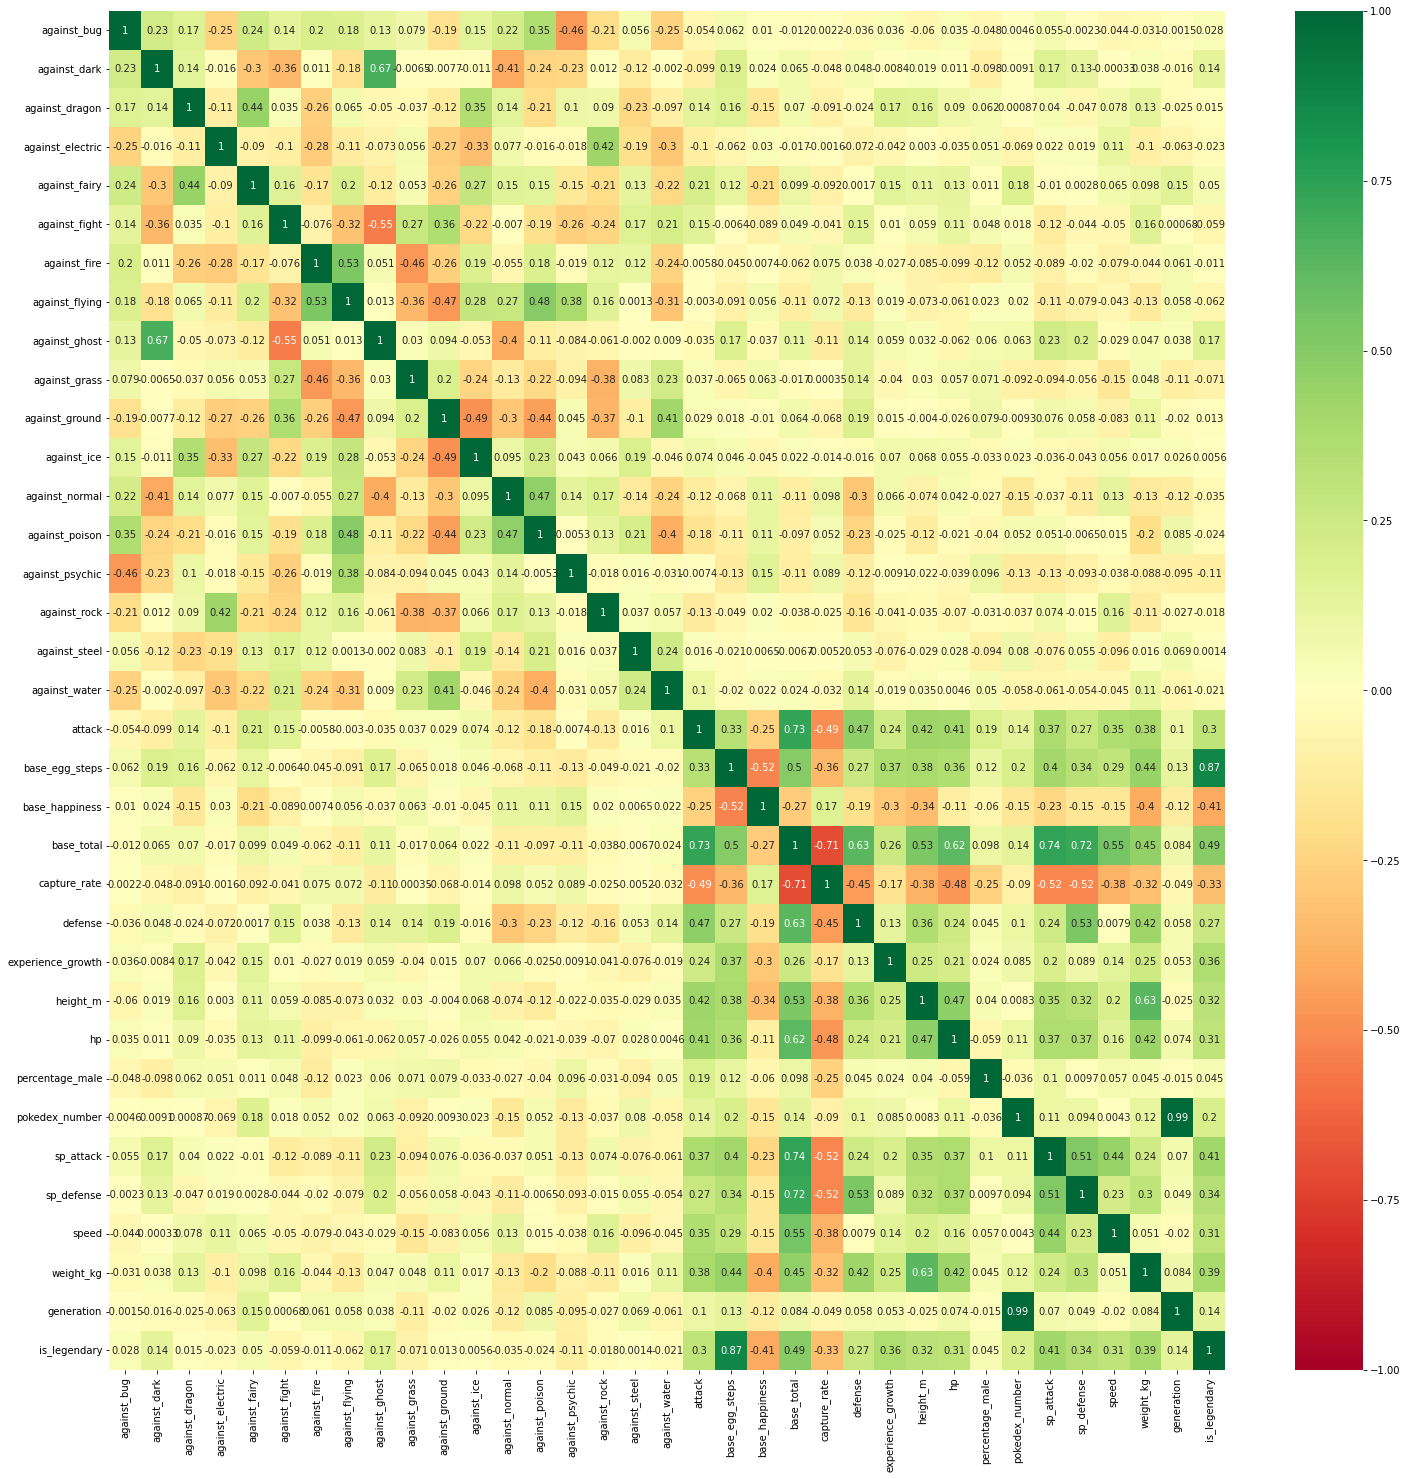

In [37]:
pok_corr = pokemon.corr()
plt.figure(figsize=(25,25))
sns.heatmap(pok_corr,cmap='RdYlGn',annot=True,center=0,vmin=-1.0,vmax=1.0)
plt.show()

## <font color = red> ***Numeric-Numeric*** </font>

### <font color = red>***From the heat map we can infer the following***</font>
- Legendary pokemons takes most steps for hatching an egg.
- Pokemon which are good against ghost are good against dark aswell.
- Pokemon which are good in fight are good against ghost.

## <font color = red> ***Numeric-Categorical*** </font>

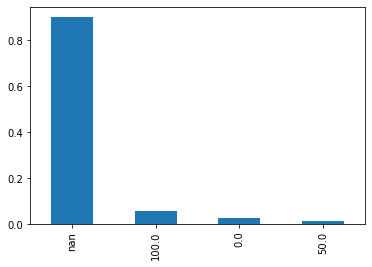

In [38]:
legendary_pokemon = pokemon[pokemon.is_legendary == 1].reset_index()
legendary_pokemon.percentage_male.value_counts(dropna=False,normalize=True).plot.bar()
plt.show()

### <font color = red>***90% of the legendary pokemon have no specific gender***</font>

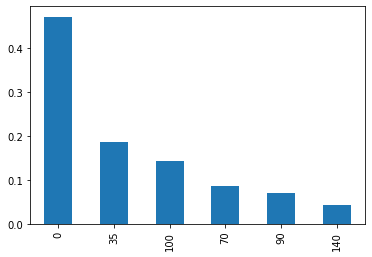

In [39]:
legendary_pokemon.base_happiness.value_counts(normalize=True).plot.bar()
plt.show()

### <font color = red>***More than 40% of the legendary pokemon have 0 base happiness value***</font>

In [40]:
legendary_pokemon.base_egg_steps.value_counts(normalize=True)

30720    0.671429
20480    0.228571
3840     0.057143
2560     0.028571
6400     0.014286
Name: base_egg_steps, dtype: float64

### <font color = red>***67% of the legendary pokemon needs 30,720 steps for hatching egg***</font>

## <font color = red>***Strongest Pokemon***</font>

In [41]:
cols  = ['against_bug', 'against_dark', 'against_dragon','against_electric', 'against_fairy', 'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground','against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water', 'attack','sp_attack']
pokemon['Total Strength'] = pokemon[cols].sum(axis=1)

In [42]:
strong = pokemon.sort_values(['Total Strength'],ascending=False)
strong['name'][0]

'Bulbasaur'

In [43]:
strong['name'][800]

'Magearna'

## <font color = red>***Strongest Pokemon :Bulbasaur || Weakest Pokemon: Magearna***</font>